<a href="https://colab.research.google.com/github/rodrigomauricios/data_science/blob/master/analise_dos_dados_do_campeonato_brasileiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise dos dados do campeonato brasileiro do ano 2000 até 2019. Nesse notebook vou extrair algumas informações dos dados, gerar gráficos com algumas dessas informações utilizando Python e as bibliotecas Pandas, Matplotlib e Seaborn.

# **Importando a biblioteca Pandas**

In [ ]:
import pandas as pd

# **Lendo o arquivo com os dados**

In [ ]:
df = pd.read_csv('campeonato-brasileiro-full.csv')

**Exibindo o conjunto de dados**

Conjunto de dados podem ser muito grande, pensando nisso, o comando df.head() que usei abaixo faz com que nos mostre apenas as cinco primeiras linhas do conjunto de dados.

In [ ]:
df.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


**Analisando a estrutura do Dataframe**

O conjunto de dados possui 7939 linhas e 13 colunas conforme é exibido abaixo:

In [ ]:
df.shape

(7939, 13)

# **Renomeando colunas**

Para ficar mais fácil a manipulação dos dados, vou fazer pequenas alterações nos nomes das colunas, vou alterar as iniciais de maiúsculas pra minúsculas, retiras os acentos, alterar os espaços por "_" e alterar os nomes das colunas Clube 1 por mandante, Clube 2 por visitante, Clube 1 Gols por mandante_gols, Clube 2 Gols por visitante_gols, Clube 1 Estado por mandante_estado, Clube 2 Estado por visitante_estado e Estado Clube Vencedor por vencedor_estado.

**Visualizando os nomes atuais das colunas**

In [ ]:
df.columns

Index(['Horário', 'Dia', 'Data', 'Clube 1', 'Clube 2', 'Vencedor', 'Rodada',
       'Arena', 'Clube 1 Gols', 'Clube 2 Gols', 'Clube 1 Estado',
       'Clube 2 Estado', 'Estado Clube Vencedor'],
      dtype='object')

**Alterando o nome das colunas**

In [ ]:
df.columns = ['horario', 'dia', 'data', 'mandante', 'visitante', 'vencedor', 'rodada',
       'arena', 'mandante_gols', 'visitante_gols', 'mandante_estado',
       'visitante_estado', 'vencedor_estado']

Aqui já podemos ver os nomes das colunas alterados no Dataframe

In [ ]:
df.head(3)

,horario,dia,data,mandante,visitante,vencedor,rodada,arena,mandante_gols,visitante_gols,mandante_estado,visitante_estado,vencedor_estado
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES


# **Total de gols em todas as edições do campeonato brasileiro**

In [ ]:
total_gols_mandante = df.mandante_gols.sum()
total_gols_mandante

12677

In [ ]:
total_gols_visitante = df.visitante_gols.sum()
total_gols_visitante

8356

In [ ]:
total_gols = total_gols_mandante + total_gols_visitante
total_gols

21033

O total de gols em todas as edições do campeonato brasileiro foi 21033

# **Horário com mais jogos no campeonato brasileiro**

In [ ]:
df.horario.value_counts().head(1)

16h00    1804
Name: horario, dtype: int64

O horário com mais jogos no campeonato brasileiro foi as 16h00 e foram realizadas 1804 partidas nesse horário.

# **Dia da semana com mais jogos**

In [ ]:
dia_mais_jogos = df.dia.value_counts()
dia_mais_jogos.head(1)

Domingo    3673
Name: dia, dtype: int64

O dia da semana que teve mais jogos foi o Domingo com 3673 partidas realizadas nesse dia.

# **Dia da semana com menos jogos**

In [ ]:
dia_menos_jogos = df.dia.value_counts()
dia_menos_jogos.sort_values(ascending=True).head(1)

Sexta-feira    24
Name: dia, dtype: int64

O dia da semana que teve menos jogos foi a Sexta-feira com 24 partidas realizadas nesse dia.

# **Time que mais empatou como mandante**

In [ ]:
df [df['vencedor'] == '-']['mandante'].value_counts().head(1)

Fluminense    101
Name: mandante, dtype: int64

O time que mais empatou como mandante foi o Fluminense com um total de 101 empates.

# **Time que mais empatou como visitante**

In [ ]:
df [df['vencedor'] == '-']['visitante'].value_counts().head(1)

Corinthians    105
Name: visitante, dtype: int64

O time que mais empatou como visitante foi o Corinthians com um total de 105 empates.

# **Time que mais empatou como mandante no ano de 2019**

Para saber qual foi o time que mais empatou como mandante no ano de 2019, será necessário criar uma nova coluna com apenas as informações dos anos.

**Criando nova coluna com o ano das partidas**

In [ ]:
df['ano'] = df['data'].apply(lambda data: data.split('-')[0])

Aqui podemos ver a nova coluna com o nome "ano" já criada e com os valores.

In [ ]:
df[['ano']]

,ano
0,2000
1,2000
2,2000
3,2000
4,2000
...,...
7934,2019
7935,2019
7936,2019
7937,2019


Após criar a nova coluna com o ano das partidas, podemos saber qual o time que mais empatou como mandante em 2019, para obter essa informação utilizo o seguinte código:

In [ ]:
df[(df['vencedor'] == '-')&(df['ano'] == '2019')]['mandante'].value_counts().head(1)

Avaí    9
Name: mandante, dtype: int64

O clube que mais empatou como mandante em 2019 foi o Avaí com um total de 9 empates.

# **Time com maior número de vitórias em todas as edições do campeonato brasileiro**

In [ ]:
df.vencedor.value_counts().head(3)


-            2040
São Paulo     348
Cruzeiro      322
Name: vencedor, dtype: int64

O São Paulo foi o time que mais venceu em todas as edições do campeonato brasileiro com 348 vitórias.

# **Time com maior número de gols como mandante**

In [ ]:
mandante_mais_gols = df.groupby("mandante")['mandante_gols'].sum().sort_values(ascending = False).head(1)
mandante_mais_gols

mandante
Santos    691
Name: mandante_gols, dtype: int64

O time que mais marcou gols como mandante foi o Santos com um total de 691 gols.

# **Top 5 times com maior número de gols como mandante**

In [ ]:
top5_mandante_mais_gols = df.groupby("mandante")['mandante_gols'].sum().sort_values(ascending = False).head()
top5_mandante_mais_gols

mandante
Santos          691
São Paulo       663
Cruzeiro        659
Atlético-MG     620
Athlético-PR    618
Name: mandante_gols, dtype: int64

Os 5 times com mais marcaram gols como mandante foram o Santos com 691 gols, São Paulo com 663 gols, Cruzeiro com 659 gols, Atlético-MG com 620 gols e o Athlético-PR com 618 gols.

**Importando o Matplotlib e o Seaborn e gerando gráfico com a informação obtida**

Agora que sabemos os 5 times que mais marcaram gols como mandante, podemos apresentar essa informação de forma visual, para isso, vou usar a bibliotecas Matplotlib e Seaborn.

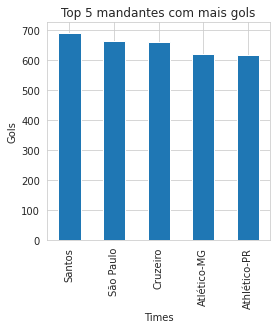

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
top5_mandante_mais_gols.plot(kind='bar', figsize=(4,4))
plt.title('Top 5 mandantes com mais gols')
plt.ylabel('Gols')
plt.xlabel('Times')
plt.show()

# **Time com maior número de gols como visitante**

In [ ]:
visitante_mais_gols = df.groupby("visitante")['visitante_gols'].sum().sort_values(ascending = False).head(1)
visitante_mais_gols

visitante
São Paulo    471
Name: visitante_gols, dtype: int64

O time com o maior número de gols como visitante é o São Paulo com um total de 471 gols.

# **Estádio que mais recebeu partidas**

In [ ]:
top_5_estadios_mais_jogos = df.arena.value_counts().head()
top_5_estadios_mais_jogos

Maracanã         593
Mineirão         447
Morumbi          387
Beira Rio        333
Serra Dourada    332
Name: arena, dtype: int64

O 5 estádios que mais receberam partidas foram o Maracanã com 593 partidas, Minerão com 447 partidas, Morumbi com 387 partidas, Beira Rio com 333 partidas e o Serra Dourada com 332 partidas.

Agora, logo abaixo a mesma informação só que de forma visual.

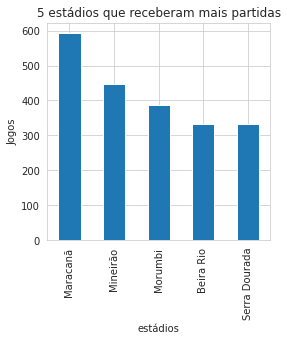

In [ ]:
top_5_estadios_mais_jogos.plot(kind='bar', figsize=(4,4))
plt.title('5 estádios que receberam mais partidas')
plt.ylabel('Jogos')
plt.xlabel('estádios')
plt.show()

# **Ano com maior número de partidas**

In [ ]:
anos_com_mais_jogos = df.ano.value_counts().head(2)
anos_com_mais_jogos

2003    552
2004    552
Name: ano, dtype: int64

Os anos 2003 e 2004 tiveram mais partidas, foram um total de 552 partidas em cada ano.

# **Ano com menor número de partidas**

In [ ]:
ano_com_menos_jogos = df.ano.value_counts().sort_values(ascending=True).head(1)
ano_com_menos_jogos

2000    329
Name: ano, dtype: int64

O ano 2000 foi o ano que menos recebeu partidas, foram 329 no total.

# **Quantidade de partidas por ano**

De forma visual, é apresentado abaixo a quantidade de partidas por ano, de 2000 até 2019.

In [ ]:
quantidade_partidas_ano = df.ano.value_counts()

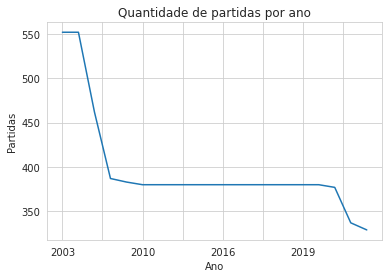

In [ ]:
quantidade_partidas_ano.plot()
plt.title('Quantidade de partidas por ano')
plt.ylabel('Partidas')
plt.xlabel('Ano')
plt.show()

Com essa visualização podemos perceber que o número de partidas se manteve a mesma desde o ano 2009 até o ano de 2019.

# **Conclusão**

Nessa análise obtemos várias informações relevantes sobre o campeonato brasileiro de 2000 até 2019, algumas como o total de gols, estádio com mais jogos e horário que teve mais partidas. Extraímos essas informações e visualizamos os gráficos utilizando Python, Pandas, Matplotlib e Seaborn.